In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Color Spaces

### egs: RGB, grayscale etc

### Conversion to grayscale

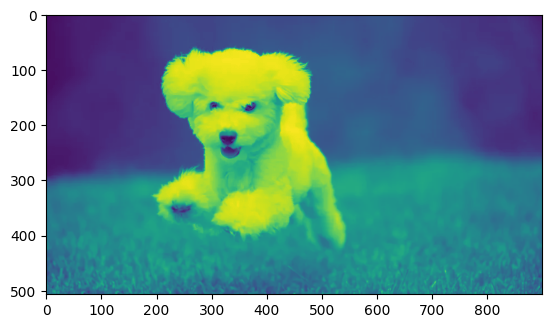

In [2]:
img = cv.imread("dog.jpeg")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray)

### Conversion to HSV

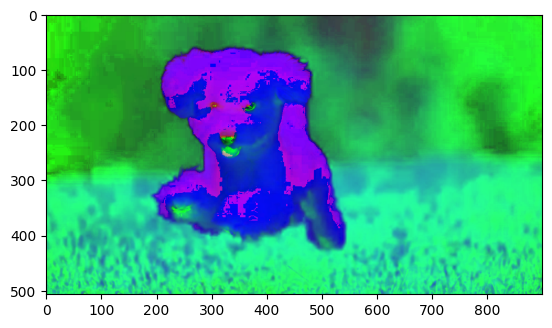

In [3]:
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
plt.imshow(hsv)

### Conversion to LAB

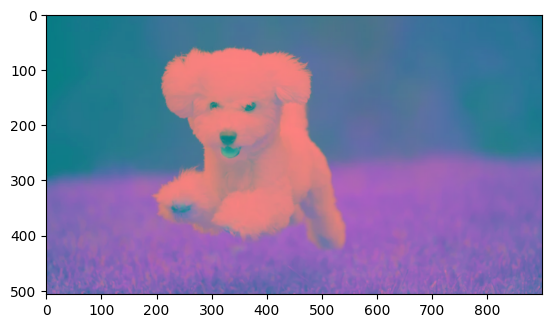

In [4]:
gray = cv.cvtColor(img,cv.COLOR_BGR2LAB)
plt.imshow(gray)

### BGR TO RGB

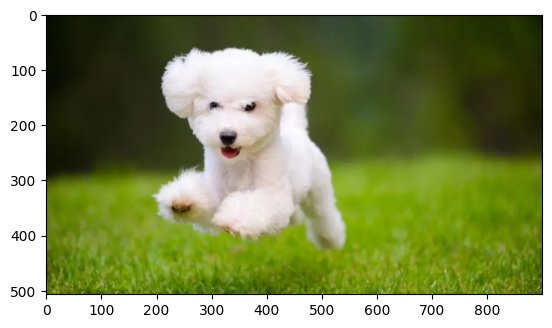

In [5]:
img = cv.imread("dog.jpeg")
gray = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(gray)

### Cant convert Grayscale to LAB directly
### First convert grayscale to BGR, Then to LAB

# Color Channels

### Color image consists of different color channels
### opencv facilitates you in splitting these channels

### Grayscale has 1 color channel
### BGR/RGB has 3 color channels

In [6]:
gray = cv.cvtColor(img,cv.COLOR_BGR2RGB)
r,g,b = cv.split(gray)
print(b.shape,g.shape,r.shape)

(507, 900) (507, 900) (507, 900)


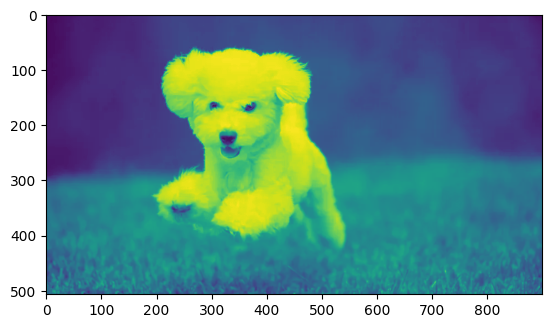

In [7]:
plt.imshow(r)

### To merge

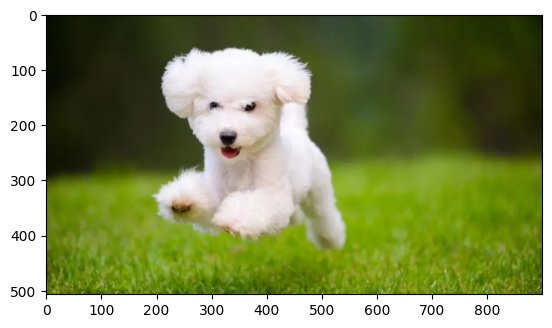

In [8]:
merged = cv.merge([r,g,b])
plt.imshow(merged)

### To see actual colors

In [9]:
blank = np.zeros(img.shape[:2],dtype="uint8")
blue = cv.merge([blank,blank,b])
red = cv.merge([r,blank,blank])
green = cv.merge([blank,g,blank])

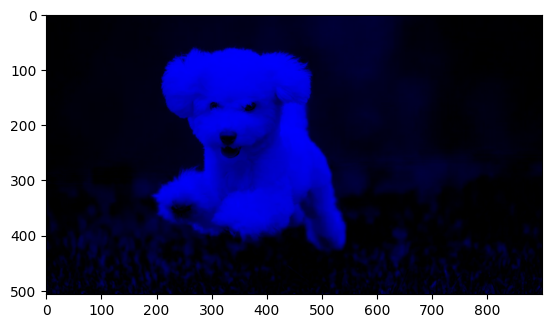

In [10]:
plt.imshow(blue)

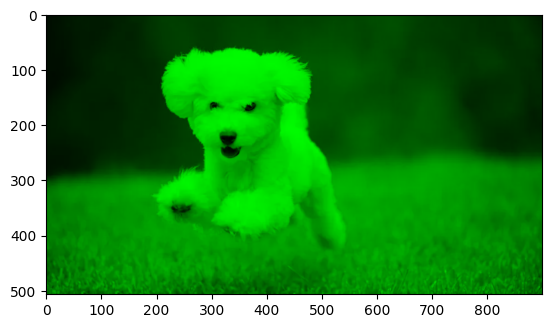

In [11]:
plt.imshow(green)

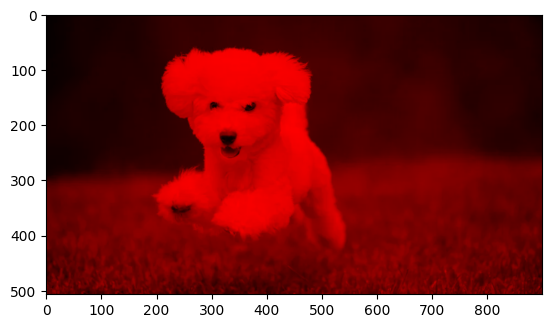

In [12]:
plt.imshow(red)

# Blurring Techniques

### to smooth out/remove noise from image

### Averaging
### Q) What happends during Average blurring process?
### Ans) Kernel used with some kernel size. Average pooling used for blurring

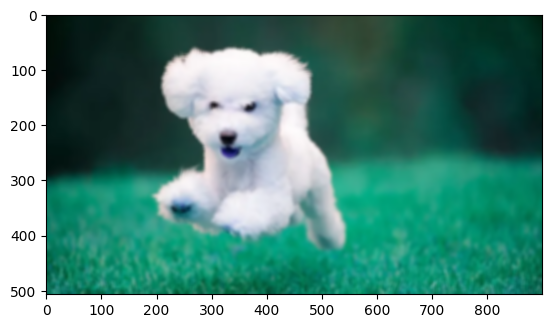

In [13]:
average = cv.blur(img,(7,7))
plt.imshow(average)

### Gausian blur
### Q) What happends during Gausian blurring process?
### Ans) Kernel used with some kernel size. Each pixel is assigned weights. average is computed using them. Gives less blur but more natural as compared to average blur

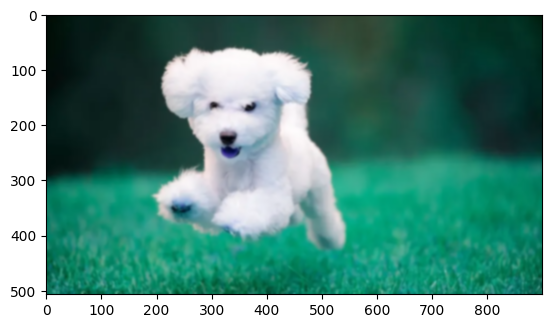

In [14]:
gaus = cv.GaussianBlur(img,(7,7),0)
plt.imshow(gaus)

### Median blur
### Similar to average blur. But instead of finding average, it finds median
### More effective as compared to avearage + gausian blur

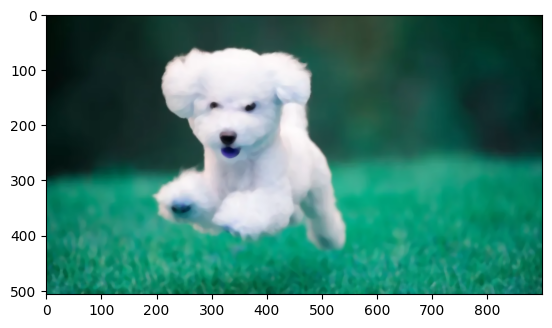

In [15]:
med = cv.medianBlur(img,7)
plt.imshow(med)

### Bilateral Blurring
##### Most effective. used in alot of computer projects
##### Other blurring techniques blur image without consider whether you are reducing edges in image or not
##### Bilateral blurring applies blurring but retains edges in image
##### We input image
##### give diameter of pixel neighbourhood(not kernel)
##### give sigma color: Larger value of sigma means more values of colors in neighbourhood will be considered
##### Sigma space : larger values means that pixels further from central pixel will influence the blurring calculation

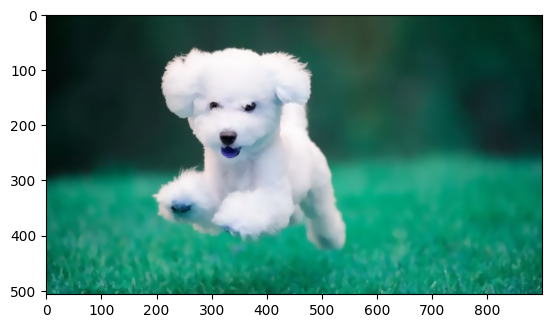

In [16]:
bilateral = cv.bilateralFilter(img,10,35,35) 
plt.imshow(bilateral)

# Bitwise Operations
### AND, OR , XOR, NOT

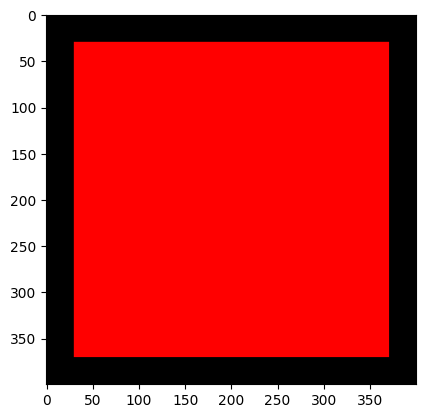

In [17]:
blank = np.zeros((400,400),dtype='uint8')
blank = cv.cvtColor(blank,cv.COLOR_BGR2RGB)
rectangle = cv.rectangle(blank.copy(),(30,30),(370,370),255,-1)
circle = cv.circle(blank.copy(),(200,200),200,255,-1)

plt.imshow(rectangle)

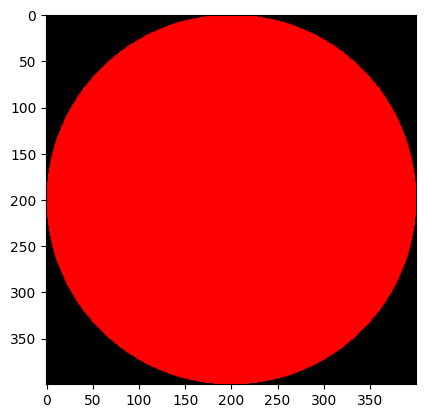

In [18]:
plt.imshow(circle)

### Bitwise AND
### Intersection of 2 images

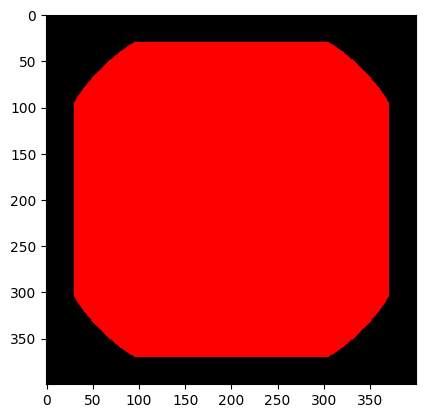

In [19]:
bitwise_and = cv.bitwise_and(rectangle,circle)
plt.imshow(bitwise_and)

### Bitwise OR
### Superimposition of 2 images

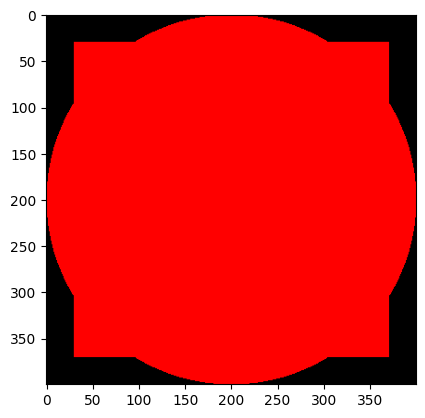

In [20]:
bitwise_or = cv.bitwise_or(rectangle,circle)
plt.imshow(bitwise_or)

### Bitwise XOR
### Returns non-intersecting regions

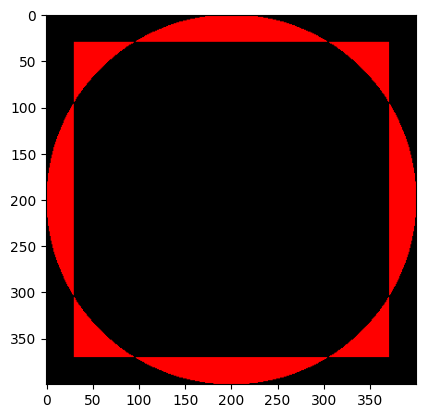

In [21]:
bitwise_xor = cv.bitwise_xor(rectangle,circle)
plt.imshow(bitwise_xor)

### Bitwise NOT
### Inverts images

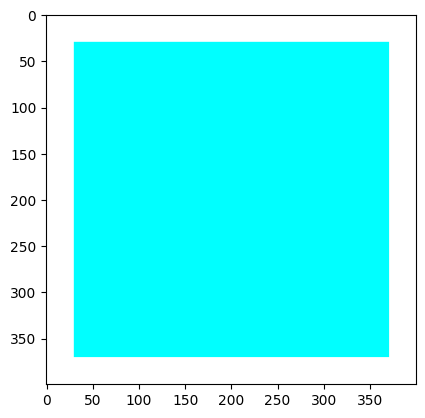

In [22]:
bitwise_not = cv.bitwise_not(rectangle)
plt.imshow(bitwise_not)

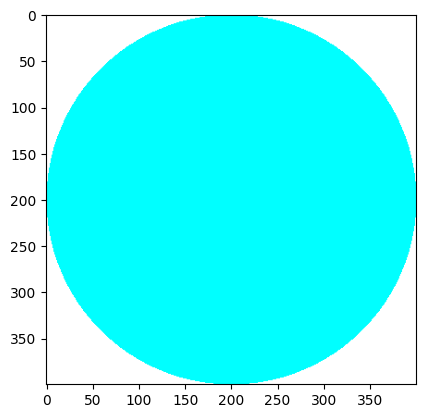

In [23]:
bitwise_not = cv.bitwise_not(circle)
plt.imshow(bitwise_not)

# Masking (using bitwise operators)
### Allows us to focus on certain parts of image that we are interested in

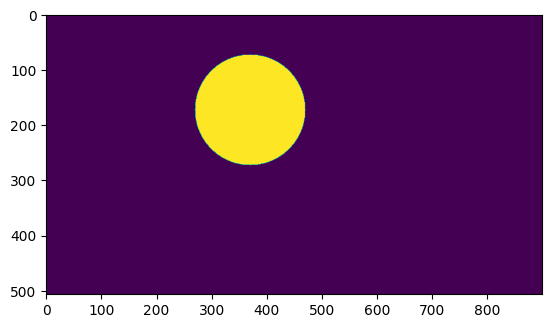

In [32]:
img = cv.imread("dog.jpeg")
blank = np.zeros(img.shape[:2],dtype='uint8')

mask = cv.circle(blank,(img.shape[1]//2-80,img.shape[0]//2-80),100,255,-1)

plt.imshow(mask)

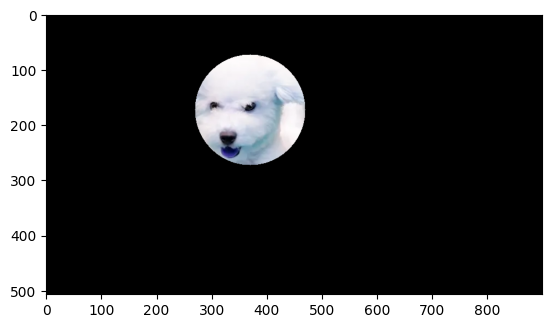

In [33]:
masked_img = cv.bitwise_and(img,img,mask=mask)
plt.imshow(masked_img)